# A Jupyter notebook to run PyVOLCANS

PyVOLCANS is an open-access Python tool that generates data-driven sets of analogue
volcanoes for any Holocene volcano listed in the Global Volcanism Program (GVP)
[Volcanoes Of The World database](https://volcano.si.edu/volcanolist_holocene.cfm) (v. 4.6.7),
based on the VOLCANS (VOLCano ANalogues Search) method presented by [Tierz, Loughlin and Calder (2019)](https://doi.org/10.1007/s00445-019-1336-3).

The main goal of PyVOLCANS is to help alleviate data-scarcity issues in volcanology, and contribute to
developments in a range of topics, including (but not limited to): quantitative volcanic
hazard assessment at local to global scales; investigation of magmatic and volcanic processes;
and even [teaching and scientific outreach](https://twitter.com/Xeno_lith/status/1384416032526266369?s=20).
Please see [this presentation](https://youtu.be/iB1uiaxScek) for examples of the application of VOLCANS/PyVOLCANS
to quantitative volcanic hazard at local to regional scales, within the [RiftVolc project](https://www.bgs.ac.uk/geology-projects/volcanoes/riftvolc/).

For further information, please check out the article published in the Journal of the Open Source Software ([Tierz et al., 2021](https://doi.org/10.21105/joss.03649)). You can also visit the [PyVOLCANS GitHub repository](https://github.com/BritishGeologicalSurvey/pyvolcans), and its [Wiki section](https://github.com/BritishGeologicalSurvey/pyvolcans/wiki).

Many thanks for your interest in using PyVOLCANS!

### Import the functions used by PyVOLCANS

In [4]:
import pyvolcans.pyvolcans_func as pvf

### Select the basic parameters to run PyVOLCANS

Three are the main parameters that PyVOLCANS uses to generate objective (i.e. data-driven), structured and reproducible sets of analogue volcanoes:

[1] **Target volcano** (`volcano_input` below): volcano for which analogue volcanoes are being sought.

[2] **_Weighting scheme_** (`weights` below): set of weights assigned to each of the volcanological criteria that PyVOLCANS uses to calculate the total analogy between any two volcanoes in the GVP database (please see equation 1 in [Tierz et al., 2019](https://doi.org/10.1007/s00445-019-1336-3). Please make sure that your sum of weights is equal to 1 (i.e. the total analogy is a weighted average of the single-criterion analogies).

[3] **Number of _top_ analogues** (`count` below): number of analogues with the highest total analogy with respect to the target volcano that are displayed as an output in this Jupyter Notebook (please check `top_analogues` variable below).

In [6]:
# Prepare arguments
volcano_input = 221190  # Can be name [str] or Smithsonian ID (vnum) [int]
weights = {'tectonic_setting': 0.2,
           'geochemistry': 0.2,
           'morphology': 0.2,
           'eruption_size': 0.2,
           'eruption_style': 0.2
          }
count = 10

# Validate input arguments
if isinstance(volcano_input, int):
    volcano_idx = pvf.get_volcano_idx_from_number(volcano_input)
    volcano_name = pvf.get_volcano_name_from_idx(volcano_idx)
    volcano_vnum = volcano_input
else:
    volcano_name = volcano_input
    volcano_vnum = pvf.get_volcano_number_from_name(volcano_input)

assert sum(weights.values()) == 1  # Weights must add up to 1

# Calculate analogy scores
volcans_result = pvf.calculate_weighted_analogy_matrix(volcano_input, weights)
top_analogues, volcano_name = pvf.get_analogies(volcano_input, volcans_result, count)
pvf.warn_on_perfect_analogues(result=top_analogues)

### Display a list with the _top 'count'_ analogues

Besides the name, country, Smithsonian ID (or VNUM) and the total analogy for each of the calculated _top_ analogues, the Pandas DataFrame `top_analogues` stores the values of each of the single-criterion analogies for each of these _top_ analogues: analogy in tectonic setting (ATs), analogy in geochemistry (AG), analogy in volcano morphology (AM), analogy in eruption size (ASz) and analogy in eruptive style (ASt). The sum of single-criterion analogies makes up the value of the total analogy between the target and analogue volcanoes.

In [8]:
# Display the top 10 best matches
top_analogues

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
117,Emuruangogolak,Kenya,222051,0.934646,0.2,0.158824,0.178947,0.200000,0.196875
17,Pantelleria,Italy,211071,0.931199,0.2,0.186275,0.184211,0.200000,0.160714
136,Kyejo,Tanzania,222170,0.928560,0.2,0.158824,0.194737,0.200000,0.175000
88,Kone,Ethiopia,221200,0.925774,0.2,0.182353,0.168421,0.200000,0.175000
979,Black Butte Crater Lava Field,United States,324010,0.923673,0.2,0.147059,0.176614,0.200000,0.200000
982,Hell's Half Acre,United States,324040,0.915480,0.2,0.147059,0.168421,0.200000,0.200000
114,"Barrier, The",Kenya,222030,0.911452,0.2,0.144706,0.189474,0.200000,0.177273
128,Longonot,Kenya,222100,0.903199,0.2,0.147059,0.189474,0.200000,0.166667
980,Craters of the Moon,United States,324020,0.899587,0.2,0.162745,0.136842,0.200000,0.200000
142,Nyamuragira,DR Congo,223020,0.887751,0.2,0.147059,0.173684,0.196452,0.170556


### Display data available for the target volcano

For each particular target volcano chosen by the user, different types and amounts of data may be available, coming mainly from the GVP database, but complemented by two volcano-morphology databases (please refer to the [Source datasets](https://link.springer.com/article/10.1007/s00445-019-1336-3#Sec2) section and [Electronic Supplementary Material](https://link.springer.com/article/10.1007/s00445-019-1336-3#Sec25) of [Tierz et al., 2019](https://doi.org/10.1007/s00445-019-1336-3) for more details on the data used by PyVOLCANS).

Note that, if data are missing for one or more volcanological criteria, PyVOLCANS will calculate a single-criterion analogy (for that criterion or criteria) equal to zero between the target volcano and any other volcano in the GVP database. As explained above, a Warning message is thrown by the `calculate_weighted_analogy_matrix()` function when this is the case.

In [10]:
# Print full data about source volcano
pvf.get_volcano_source_data(volcano_input)

{'name': 'Fentale',
 'country': 'Ethiopia',
 'smithsonian_id': 221190,
 'tectonic_setting': {0.5: 'Rift Continental Crust'},
 'geochemistry': {'Foidite': 0.0,
  'Phonolite': 0.0,
  'Trachyte': 0.25,
  'Trachyandesite/Basaltic trachyandesite': 0.0,
  'Phono-tephrite/Tephri-phonolite': 0.0,
  'Tephrite/Basanite/Trachybasalt': 0.25,
  'Basalt': 0.0,
  'Andesite': 0.25,
  'Dacite': 0.0,
  'Rhyolite': 0.25},
 'morphology': 0.6842105263157895,
 'eruption_size': {'VEI leq 2': 1.0,
  'VEI 3': 0.0,
  'VEI 4': 0.0,
  'VEI 5': 0.0,
  'VEI 6': 0.0,
  'VEI 7': 0.0,
  'VEI 8': 0.0},
 'eruption_style': {'Lava flow and/or fountaining': 1.0,
  'Ballistics and tephra': 0.0,
  'Phreatic and phreatomagmatic activity': 0.0,
  'Water-sediment flows': 0.0,
  'Tsunamis': 0.0,
  'Pyroclastic density currents': 0.0,
  'Edifice collapse/destruction': 0.0,
  'Caldera formation': 0.0}}

### Some other simple but useful examples of what PyVOLCANS can provide

#### Choose one specific volcano to display analogies for

The code searches the Pandas DataFrame `volcans_result` by volcano name and displays the total and single-criterion analogies between the target and matched volcanoes. Please note that `volcans_result` actually contains the analogy values between the target volcano and **any** other volcano in the entire GVP database.

In [12]:
# Check the analogy for a specific volcano by name
volcans_result.loc[volcans_result['name'] == 'Santorini']

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
21,Santorini,Greece,212040,0.775685,0.1,0.184967,0.168421,0.17438,0.147917


An equivalent search within `volcans_result` but using the Smithsonian ID (or VNUM) instead of the volcano name.

In [14]:
# Check the analogy for a specific volcano by ID
volcans_result.loc[volcans_result['smithsonian_id'] == 371050]

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
1351,Hengill,Iceland,371050,0.823474,0.1,0.162745,0.168421,0.2,0.192308


#### Choose _a priori analogues_ and display/plot their data

One very interesting feature of PyVOLCANS, which makes direct use of the `volcans_result` Pandas DataFrame, is the possibility of selecting sets of _a priori analogues_ for the target volcano and comparing them with the rest of volcanic systems in the whole GVP database. That is, provided that PyVOLCANS calculates the total analogy between the target volcano and **any** volcano in the GVP database, the program can calculate, for example, the proportion, or percentage, of volcanoes in the database that are classified as _better analogues_ (i.e. higher total analogy) than the selected _a priori analogues_. Please note that _a priori analogues_ may be defined as volcanoes considered to be _good analogues_ for the target volcano by means different to applying PyVOLCANS: e.g. considering expert judgement and/or the use of other, complementary, datasets or databases (e.g. volcanic-unrest databases, like [WOVOdat](https://www.wovodat.org/); or databases that focus on large-magnitude eruptions only, like [LaMEVE](https://www2.bgs.ac.uk/vogripa/view/controller.cfc?method=lameve), etc). Please see [Tierz et al., 2019](https://doi.org/10.1007/s00445-019-1336-3) for more details on _a priori analogues_.

Immediately below, the user can choose a given set of _a priori analogues_ to display and plot data for. The first cell of code displays the volcano name as well as the single-criterion analogies for each of the _a priori analogues_. Subsequently, a bar plot displaying those single-criterion analogies on different colours is generated (please note that the overall height of each bar corresponds with the total analogy between the target volcano and the _a priori analogue_).

<ins>**Important note**</ins>: please choose your _a priori analogues_ using either volcano name or Smithsonian ID (VNUM) but not mixtures of the two data types as, currently, this would make the code crash. We will work on fixing this issue to allow full flexibility in introducing the sets of _a priori analogues_. Many thanks for your understanding.

,name,ATs,AG,AM,ASz,ASt
962,Newberry,0.10,0.158824,0.189474,0.190616,0.179545
17,Pantelleria,0.20,0.186275,0.184211,0.200000,0.160714
52,Erta Ale,0.15,0.158824,0.189474,0.200000,0.170833
215,Mayor Island,0.10,0.123529,0.173684,0.109091,0.125000
983,Yellowstone,0.20,0.147059,0.152632,0.000000,0.125000


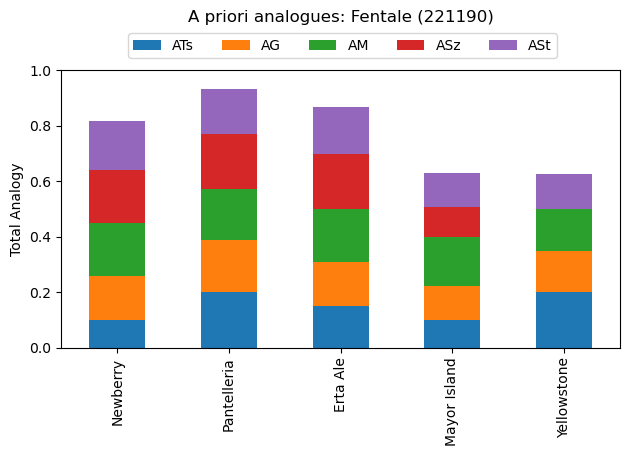

In [16]:
# Plot comparisons with specific volcanoes selected apriori
apriori_volcanoes = ['Newberry', 'Pantelleria', 'Erta Ale', 'Mayor Island', 'Yellowstone']

# weights label is used in the filename if save_figure is True
weights_label = 'Ts{:.3f}G{:.3f}M{:.3f}Sz{:.3f}St{:.3f}'.format(*weights.values())

pvf.plot_bar_apriori_analogues(volcano_name, volcano_vnum, apriori_volcanoes,
                               volcans_result, weights_label, save_figure=False)

The cell below calculates the percentages of volcanoes in the entire GVP database that are classified as _better analogues_ (i.e. higher total analogy), for the target volcano, than each _a priori analogue_ selected by the user. In other words, if there are very few volcanoes in the GVP database that have higher values of total analogy with the target volcano, then the percentage of _better analogues_ for that particular _a priori analogue_ will be low, and vice versa.

Finally, the percentages of _better analogues_ are shown in a bar plot, with the _y_-axis (displaying the percentage) capped at 50%, implicitly meaning that half or more of the volcanoes in the GVP database (N ~ 1440) are classified as _better analogues_, to the target volcano, than the selected _a priori analogue_.

<ins>**Important note**</ins>: similarly to the fact that each set of _top_ analogues computed by PyVOLCANS corresponds, specifically, to the particular weighting scheme used to run the code, the values of total analogy, and the percentages of _better analogues_, calculated and shown for the _a priori analogues_ <ins>strictly depend</ins> on the specific weighting scheme chosen, on top of this Notebook, to carry out each specific PyVOLCANS run. Try it for yourself if you change the `weights` dictionary to have `'eruption_size': 1` (and the other weights set up to zero) or `'eruption_size': 0.5`, `'eruption_style': 0.5` (and the other weights set to zero). For more details on how changes in the weighting scheme influence the PyVOLCANS results, and/or those of variables calculated using the PyVOLCANS results, please see [Tierz et al. (2019)](https://doi.org/10.1007/s00445-019-1336-3) on the VOLCANS method, and [Tierz et al. (2020)](https://doi.org/10.1029/2020GC009219) on the application of VOLCANS to quantify volcanic hazard at Aluto volcano, Ethiopia. Many thanks.



According to PyVOLCANS, the following percentage of volcanoes in the GVP database
are better analogues to Fentale than the 'a priori' analogues reported below:

Newberry (322110): 5%

Pantelleria (211071): 1%

Erta Ale (221080): 1%

Mayor Island (241021): 45%

Yellowstone (325010): 46%



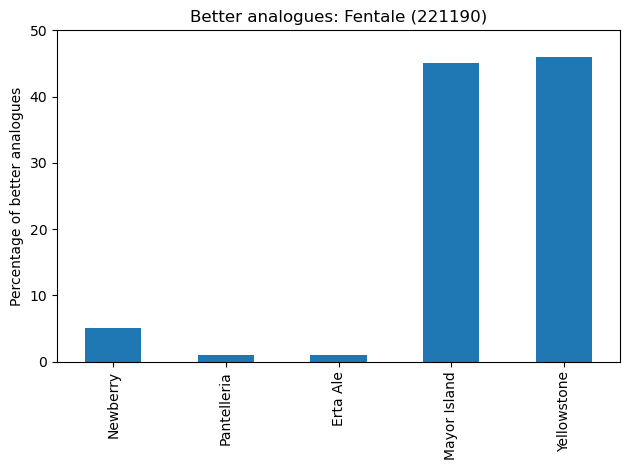

In [18]:
# Display proportion of better analogues than apriori volcanoes
percentiles, better_analogues = pvf.get_many_analogy_percentiles(volcano_input,
                                                                 apriori_volcanoes,
                                                                 volcans_result)

better_analogues_df = pvf.plot_bar_better_analogues(volcano_name, volcano_vnum, better_analogues,
                                                    weights_label, save_figure=False)